In [1]:
import numpy as np
import matplotlib.pyplot as plt

###### Plot Zeugs

In [2]:
def new_plot(settings):
    if settings != None and settings != {}:
        

        if "figsize" in settings:
            figsize_multiplier = settings["figsize"]
        else:
            figsize_multiplier = 1

        if "axis" in settings and "subplots" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif "axis" in settings and not("subplots" in settings):
            fig, axs = plt.subplots( figsize=( (settings["axis"]["x"][1] - settings["axis"]["x"][0]) * figsize_multiplier, ( settings["axis"]["y"][1] - settings["axis"]["y"][0]) * figsize_multiplier ))
        elif not("axis" in settings) and "subplots" in settings and not("figsize" in settings):
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"])
        elif not("axis" in settings) and "subplots" in settings and "figsize" in settings:
            fig, axs = plt.subplots( settings["subplots"]["rows"], settings["subplots"]["cols"], figsize=(figsize_multiplier,figsize_multiplier))    
        elif not("axis" in settings) and not("subplots" in settings) and "figsize" in settings:
            fig, axs = plt.subplots(figsize=(figsize_multiplier,figsize_multiplier))
        else:
            fig, axs = plt.subplots()
 
        if(np.size(axs) == 1):
            axs = [axs]

        for ax in axs:
        #Achsen Skala
            if "lock_axis" in settings and settings["lock_axis"] and "axis" in settings:
                ax.axis([settings["axis"]["x"][0],settings["axis"]["x"][1],settings["axis"]["y"][0],settings["axis"]["y"][1]])

            #Achsen Beschriftunge
            if "axis_label_steps" in settings and "axis" in settings:
                ax.set_xticks( np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["axis_label_steps"]["x"]))
                ax.set_yticks( np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["axis_label_steps"]["y"]))
            

            #Gitter
            if "grid" in settings:
                if "axis" in settings and "minor_steps" in settings["grid"]:
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1, settings["grid"]["minor_steps"]["x"]),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1, settings["grid"]["minor_steps"]["y"]),minor=True)

                elif "axis" in settings and not("minor_steps" in settings["grid"]):
                    ax.set_xticks(np.arange(settings["axis"]["x"][0], settings["axis"]["x"][1] +1),minor=True)
                    ax.set_yticks(np.arange(settings["axis"]["y"][0], settings["axis"]["y"][1] +1),minor=True)
                    
                else:
                    ax.minorticks_on()

                ax.grid(which='minor', alpha=settings["grid"]["minor_alpha"])
                ax.grid(which='major', alpha=settings["grid"]["major_alpha"])

            #Achsen Verhältings
            if "aspect" in settings:
                ax.set_aspect(settings["aspect"])

        if(np.size(axs) == 1):
            axs = axs[0]

    else:
        fig, axs = plt.subplots()
    
    return fig, axs

In [3]:
def draw_plot(x,y,color,settings=None,subplot=(None,None)):

    if subplot == (None,None):
        fig, ax = new_plot(settings)
    else:
        fig, ax = subplot
 
    if np.size(ax) > 1:
        for i in range(0, np.size(ax)):
            ax[i].plot(x[i], y[i], color[i])
    else:
        ax.plot(x, y, color)
    
    return fig, ax

# Aufgabe 

##### plot_settings

In [4]:
plot_settings={
    "axis":{
        "x": (0,6),
        "y": (-1,3)
    },
    "aspect": 'equal',
    "axis_label_steps":{
        "x": 1,
        "y": 1,
    },
    "lock_axis": True,
    "grid":{
        "minor_alpha": 0.2,
        "major_alpha": 0.8,
        "minor_steps":{
            "x": 0.5,
            "y": 0.5
        }
    }
}

#### Lösung

In [5]:
def polynominterpolation_VmM(points):
    X = [] # Vandermonde-Matrix
    f = [] # Funktionswerte

    # Generiren der Vandermonde-Matrix und Funktionswerte aus übergeben Punkten
    for  x, y in points:
        X_row = [1, x] #X_row ist eine Zeile der Vandermonde-Matrix
        for i in range(2, len(points)):  #
            X_row.append(np.power(x, i)) # [1, x, ..., x^(n-1)], n: Anzahl der Punkte(len(points))

        X.append(X_row)
        f.append(y)

    a = np.linalg.solve(X,f) # Bestimen der Koeffizienten

    return a

In [6]:
def curve_through(points, start, ende, resolution = 1):

    # Polynominterpolation mit Vandermonde-Matrix
    # Ergebnis ist ein Polinom n-Grades wo n der Anzahl von punkten entspricht
    a = polynominterpolation_VmM(points)# a: Koeffizienten des Polinom durch die Punkte

    #x = sorted(x)
    #x = np.linspace(x[0], x[-1], resolution)

    #Den kleinsten x- und grösten x-Wert nemen (es wird erwartet das die punkt entlang der x-Achse sortitrt sind)
    x_out = np.arange(start, ende +resolution, resolution)# x_out Lister aller x zwischen kleinsten x- und grösten x-Wert mit der Schrittweite 1
    y_out = []

    # x in das Polynom einsetzen
    for x in x_out:
        y = a[0] + a[1]*x            # ----|
        for i in range(2,a.size):    #    \/
           y += a[i] * np.power(x, i)# a0 + a1*x + ... + an*x^n  , n: Anzal der Koeffizienten(a.size)
        
        y_out.append(y)

    x_out = np.append(x_out, np.nan)
    y_out = np.append(y_out, np.nan)
    return x_out, y_out

In [7]:
p_x = [1, 2, 3, 4, 5]
p_y = [0, 0, 1, 0, 0]

x, y = curve_through([(1,0), (2,0), (3,1), (4,0), (5,0)], 0, 7, 0.01) 

##### Plot

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

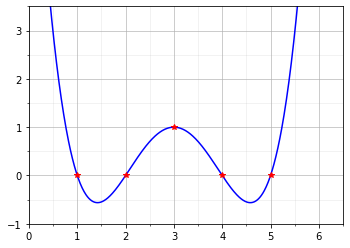

In [8]:
subplot = draw_plot(x,y,'b', plot_settings)
draw_plot(p_x,p_y,'r*', subplot=subplot)
